<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/Keras_%E8%BC%95%E6%B2%B9%E6%A1%88%E5%AD%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from keras import backend
from keras.layers import Dropout,Dense,Flatten
from keras.models import Sequential
import math
import keras.backend as K
drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 讀取數據

In [2]:
train = pd.read_csv('/content/gdrive/My Drive/台塑輕油案子/data/train_4565.csv',index_col=0)
test = pd.read_csv('/content/gdrive/My Drive/台塑輕油案子/data/test_170.csv',index_col=0)
train.append(test).head()

,T10,T50,T90,N+A,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
2,100.5,119.2,146.5,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319
3,99.6,117.9,145.5,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303
4,100.0,118.8,145.6,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289
5,100.4,118.6,142.9,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281
6,100.4,118.1,142.2,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290


# 定義欄位

In [3]:
cols = train.columns.tolist()
x_cols = cols[:4]
y_cols = cols[4:]
print(x_cols)
print(y_cols)

['T10', 'T50', 'T90', 'N+A']
['C5NP', 'C5IP', 'C5N', 'C6NP', 'C6IP', 'C6N', 'C6A', 'C7NP', 'C7IP', 'C7N', 'C7A', 'C8NP', 'C8IP', 'C8N', 'C8A', 'C9NP', 'C9IP', 'C9N', 'C9A', 'C10NP', 'C10IP', 'C10N', 'C10A']


# 特徵縮放

In [0]:
sc = StandardScaler()
train[x_cols] = sc.fit_transform(train[x_cols])
test[x_cols] = sc.transform(test[x_cols])

# y縮放

In [0]:
sc_y = StandardScaler()
train[y_cols] = sc_y.fit_transform(train[y_cols])
test[y_cols] = sc_y.transform(test[y_cols])

In [6]:
train.append(test).head()

,T10,T50,T90,N+A,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
2,0.431894,0.537538,0.457373,-1.025830,-0.656696,-0.662401,-0.455957,1.388185,0.043335,-0.599718,-0.247984,0.945498,0.754116,-0.891516,-0.394642,0.753140,0.725334,-0.945362,-0.039664,0.994414,0.580943,-0.151680,0.765172,-0.054125,0.624958,-0.404661,-0.714551
3,0.350890,0.336746,0.226896,-1.075101,-0.645038,-0.649892,-0.447299,1.220854,0.021172,-0.607274,-0.245389,0.807423,0.680581,-0.895034,-0.413999,0.667751,0.676452,-0.970661,0.005013,0.945172,0.652603,-0.446794,-0.005734,-0.041679,0.904367,1.252672,-0.746137
4,0.386892,0.475756,0.249944,-1.102020,-0.661359,-0.666351,-0.450185,1.235618,0.043903,-0.623898,-0.249022,0.805272,0.651035,-0.898772,-0.417366,0.686048,0.697263,-0.959565,0.020970,0.967057,0.695599,-0.474365,-0.024254,-0.074868,0.946195,0.820203,-0.773775
5,0.422893,0.444864,-0.372346,-1.088921,-0.679080,-0.680176,-0.453071,1.060905,0.001851,-0.684850,-0.260961,0.782045,0.501339,-0.899212,-0.437564,0.750598,0.753889,-0.910299,0.047776,1.018123,0.797459,-0.325276,-0.041617,-0.147468,0.942849,0.831364,-0.789568
6,0.422893,0.367637,-0.533680,-1.000353,-0.670220,-0.672276,-0.450185,1.103558,0.005260,-0.662182,-0.256809,0.798390,0.553864,-0.895254,-0.428307,0.734334,0.738401,-0.925390,0.041394,1.001101,0.763164,-0.399821,0.839253,-0.137097,0.261892,0.834154,-0.771800


# 拆分訓練及驗證集

In [7]:
train ,val= train_test_split(train,test_size=0.3,random_state=42)
print(train.shape)
print(val.shape)
print(test.shape)

(3195, 27)
(1370, 27)
(170, 27)


# 建立模型

In [0]:
def custom_loss(y_true, y_pred):
    error = y_true-y_pred
    sum_error = K.sum(y_pred)-K.sum(y_true)
    mse = K.mean(K.square(error))
    mae = K.mean(K.abs(error))
    sum_constraint = K.abs(sum_error)
    return mae
def custom_rmse(y_true,y_pred):
  return K.sqrt(K.mean(K.square(y_true-y_pred)))

In [9]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=4))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(23,activation=None))
model.compile(optimizer='Adam',loss=custom_loss,metrics=[custom_rmse])
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 23)                2967      
Total params: 36,631
Trainable params: 36,631
Non-trainable params: 0
_________________________________________________________________


# Model Fit

In [0]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', 
                   min_delta=0, 
                   patience=30, 
                   mode='min' , 
                   restore_best_weights=True)

In [11]:
history = model.fit(train[x_cols],train[y_cols],
                    epochs=1000,
                    batch_size=512,
                    validation_data=(val[x_cols],val[y_cols]),
                    callbacks=[es])




Train on 3195 samples, validate on 1370 samples
Epoch 1/1000





3195/3195 [==============================] - 1s 335us/step - loss: 0.7001 - custom_rmse: 0.9882 - val_loss: 0.6482 - val_custom_rmse: 0.9003
Epoch 2/1000
3195/3195 [==============================] - 0s 12us/step - loss: 0.6121 - custom_rmse: 0.9024 - val_loss: 0.5314 - val_custom_rmse: 0.7922
Epoch 3/1000
3195/3195 [==============================] - 0s 11us/step - loss: 0.4921 - custom_rmse: 0.8020 - val_loss: 0.4232 - val_custom_rmse: 0.7064
Epoch 4/1000
3195/3195 [==============================] - 0s 14us/step - loss: 0.3995 - custom_rmse: 0.7341 - val_loss: 0.3504 - val_custom_rmse: 0.6460
Epoch 5/1000
3195/3195 [==============================] - 0s 12us/step - loss: 0.3431 - custom_rmse: 0.6899 - val_loss: 0.3173 - val_custom_rmse: 0.6186
Epoch 6/1000
3195/3195 [==============================] - 0s 14us/step - loss: 0.3174 - custom_rmse: 0.6669 - val_loss: 0.2966 - val_custom_rmse: 0.6006
Epoch 7/1000
3195/3195 [=

# 訓練過程評估

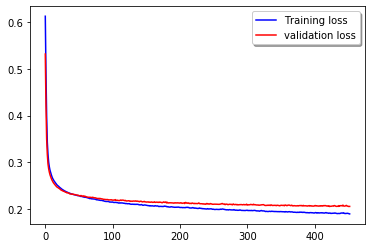

In [12]:
import matplotlib.pyplot as plt
n=1
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'][n:], color='b', label="Training loss")
ax.plot(history.history['val_loss'][n:], color='r', label="validation loss")
legend = ax.legend(loc='best', shadow=True)

#預測

In [0]:
y_pred = test[y_cols].copy()
y_pred[:] = sc_y.inverse_transform(model.predict(test[x_cols]))
test[y_cols] = sc_y.inverse_transform(test[y_cols])

# 評估

In [0]:
def metric(y_test,y_pred,name):
    res = pd.DataFrame()
    res['R2'] = [r2_score(y_test, y_pred)]
    res['RMSE'] = [sqrt(mean_squared_error(y_test,y_pred))]
    res.index = [name]
    return res

In [15]:
res = pd.DataFrame()
for y_name in y_cols:
  res = res.append(metric(test[y_name],y_pred[y_name],y_name))
res.loc['AVG'] = res.mean()
res

,R2,RMSE
C5NP,0.861604,0.317919
C5IP,0.764240,0.248469
C5N,0.945130,0.032067
C6NP,0.125958,0.378240
C6IP,0.856731,0.395641
C6N,0.853060,0.634804
C6A,0.164247,0.156190
C7NP,0.986725,0.253392
C7IP,0.866494,0.403752
C7N,0.959735,0.836224
